<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/OSI-SAF_banner.png' align='right' width='100%'/>

<a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="./1_3a_OSI_SAF_SST_mapping_Global_Metop_SST.ipynb" target="_blank"><< Mapping Global Metop AVHRR SST products</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_3c_OSI_SAF_SST_mapping_NAR.ipynb" target="_blank">Mapping NAR SST products >></a>

<font color="#138D75">**EUMETSAT OSI SAF Training Service**</font> <br>
**Copyright:** 2025 EUMETSAT <br>
**License:** MIT

<html>
  <div style="width:100%">
    <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fsensors%2Flearn-osi-saf-sst/HEAD?labpath=1_OSI_SAF_sst_introductory%2F1_3c_OSI_SAF_SST_mapping_MSG_SST.ipynb"><img src="https://mybinder.org/badge_logo.svg" alt="Open in Binder"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
</html>

<div class="alert alert-block alert-success">
<h3>Learn OSI SAF sea surface temperature: Introductory</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
The following modules are prerequisites for this notebook, and will retrieve the data required here.
  - **<a href="./1_1b_OSI_SAF_SST_data_access_IFREMER_FTP.ipynb" target="_blank">1_1b_OSI_SAF_SST_data_access_IFREMER_FTP.ipynb</a>**

</div>
<hr>

# 1.3b Mapping Geostationary SST

### Data used 

| Dataset | EUMETSAT collection ID | OSI SAF website description | OSI SAF identifier |
|:-----------------:|:-----------------:|:-----------------:|:-----------------:|
| Meteosat Sea Surface Temperature | EO:EUM:DAT:METEOSAT:OSIHSST- | <a href="https://osi-saf.eumetsat.int/products/osi-206-a" target="_blank">Description</a>| OSI-206-a |
| GOES-East Sea Surface Temperature | EO:EUM:DAT:GOES:OSIHSST-NCC | <a href="https://osi-saf.eumetsat.int/products/osi-207-b" target="_blank">Description</a>| OSI-207-b |
| Meteosat Indian Ocean Sea Surface Temperature |  | <a href="https://osi-saf.eumetsat.int/products/osi-io-sst" target="_blank">Description</a>| OSI-IO-sst |

### Learning outcomes

At the end of this notebook you will know;
* How to open Geostationary SST files
* Map SST using cartopy 

### Outline

After ploting data from global products issued from polar orbiting satellites,we will not worked on products issued from **Geostationnary satellites**, orbiting above the equator at the same rythm than the earth (=allways being above the same point on earth surface). OSI SAF distributes data from satellites in 3 geostationnary positions:
* GOES East (75°W), position currently operated by the NOAA satellite GOES-19
* Meteosat 0°, position currently operated by the EUMETSAT satellite Meteosat-12
* Meteosat IO (45.5°E), position currently operated by the EUMETSAT satellite Meteosat-9

For each of these positions, OSI SAF is distributing a **Near Real Time** products, that gather all the measurements done in one hour (4 to 6 depending on the satellite generation). These products are then hourly **level 3** (temporal agregate of satellite measurements).
We will here see how to plot data from these three products. The three products are sharing the same characteristics, so that they can be easily compared. To note that the Meteosat IO product is a demonstrational product. This is due to the fact that the position is operated as a best effort by EUMETSAT, however the product is similar to the other geostationnary products.


<div class="alert alert-info" role="alert">

## <a id='TOC-TOP'></a>Contents

</div>

 1. [Setting parameters](#section1)
 1. [Map SST](#section3)
 

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../README.md" target="_blank">README</a>**.

In [2]:
# library imports 
import os                          # a library that allows us access to basic operating system commands
import xarray as xr                # a library that supports the use of multi-dimensional arrays in Python
import matplotlib as mpl           # a library for visualization
import matplotlib.pyplot as plt    # a library that supports plotting
import matplotlib.cm as mpl_cm     # a part of the plotting library that provides colour maps
import cartopy.crs as ccrs         # a mapping library that supports reprojection
import cartopy.feature as cfeature # a part of the mapping library that provides features such as coastlines
import cmocean                     # colormaps for ocean products
import cmcrameri                   # scientific colormaps for data visualisation
import urllib                      # a library that helps us read in remote resources from URLs
from PIL import Image              # a library that helps us plot images
import numpy as np                 # a library that supports array manipulation
import warnings                    # a library that controls python warnings
warnings.filterwarnings('ignore')

<div class="alert alert-warning" role="alert">

## <a id='section0'></a>0. Supporting functions
[Back to top](#TOC-TOP)

</div>

Before we begin, we will define shorts functions.

The function name `mapping_sst` creates a plot figure of the sst product available in the directory **dir** with a specific output projection and a specific region of the globe if given.

In [3]:
def mapping_sst(dir, output_projection, cmap, ax=None, title="", region=None): 
    """
    Function to map Sea Surface Temperature. 

    Args:
        dir (string)        : the directory where files are
        output_projection   : the output projection to plot map
        cmap                : color palette
        ax                  : the axis of the plot
        title (sting)       : title of the plot
        region (list)       : the region to zoom in. If not region is given, plot a global map
        
    Returns:
        im                  : the plotting figure

    """
    
    # set data projection
    data_projection=ccrs.PlateCarree()

    # define plot carateristics
    if not ax : ax = plt.axes([0.1,0.1,0.75,0.85], projection=output_projection)
    ax.add_feature(cfeature.OCEAN, zorder=0, facecolor='dimgrey') # Change color of ocean
    ax.add_feature(cfeature.LAND, zorder=0, facecolor='silver') # Change color of land
    ax.gridlines(draw_labels=True) # Add coasrline
    ax.coastlines('10m') # Draw coastline
    # Select region to zooming 
    if region : 
        ax.set_extent(region, crs=output_projection)
    else :
        ax.set_global()
    
    # Add title
    plt.title(title, fontsize=18)

    # open and plot data
    for filename in os.listdir(dir):
        if filename.endswith(".nc"):
            nc = xr.open_dataset(os.path.join(dir, filename))
            lat = nc.variables['lat'][:]    
            lon = nc.variables['lon'][:]
            sst = nc.variables['sea_surface_temperature'][:]
            ql  = nc.variables['quality_level'][:]
            nc.close()

            # Use only SST with quality_level > 2
            sst_ql345 = np.ma.masked_where(ql<3, sst)
            
            SST = sst_ql345[0,:,:]-273.15
            # plotting sst
            im = plt.pcolormesh(lon, lat, SST, transform=data_projection, cmap=cmap)

            # set the min and max temperature for apropriate visualisation
            # As we are going to plot several products and try to compare them, we need to have a fixed common palette. 
            # The one we used in the previous chapter will set a palette for each data file read depending on the min/max in the file.
            # im.set_clim(np.nanmin(SST),np.nanmax(SST))
            # we will here rather use a -2°C/36°C palette
            im.set_clim(-2,36)
            
    return im

The function name `add_colorbar` create a colorbar of the image im.

In [4]:
def add_colorbar(im, fig, orientation, cmap, discrete=False, extend='neither'):
    """
    Function to add a colormap. 

    Args:
        im                         : image
        fig                        : figure
        orientation (string)       : the orientation of colorbar (horizontal or vertical)
        cmap                       : color palette
        dicrete (bool)             : add discrete color
        extend                     : extension type of the colorbar (neither, max, min or both) 

    """
    
    if orientation == 'horizontal':
        axc = fig.add_axes((0.1,0.1,0.75,0.02))
        ax = fig.add_axes([0.43,0.12,0.1,0.05], anchor='S', zorder=-1 )
    else :
        axc = fig.add_axes((0.85,0.2,0.02,0.85))
        ax = fig.add_axes([0.8,.1,0.1,0.05], anchor='S', zorder=-1 )

    if discrete:
        bounds = range(int(im.get_clim()[0]),int(im.get_clim()[1]))
        norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
        cb = plt.colorbar(im, orientation=orientation, cax=axc, extend=extend, norm=norm, spacing='proportional', ticks=bounds, boundaries=bounds)
    else:
        cb = plt.colorbar(im, orientation=orientation, cax=axc, extend=extend)
    
    url = "https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/OSISAF_Name_Colour.png"
    logo = np.array(Image.open(urllib.request.urlopen(url)))
    
    ax.imshow(logo)
    ax.axis('off')
    
    cb.set_label('SST [°C]', fontsize=18)
    cb.ax.tick_params(labelsize=14)

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Setting parameters
[Back to top](#TOC-TOP)

</div>

Let's set the directories where to read the data files from. As we will plot data from 3 different products, we will create a different alias for each directory.

In [5]:
directory_Met0 = os.path.join(os.getcwd(), 'products', 'L3_Meteosat_0°')
directory_GOES = os.path.join(os.getcwd(), 'products', 'L3_GOES-E')
directory_MetIO = os.path.join(os.getcwd(), 'products', 'L3_Meteosat_IO')

Choose a colormap for your data set. <br>
For memory :
* <a href="https://matplotlib.org/stable/tutorials/colors/colormaps.html" target="_blank">matplotlib colormaps</a>
* <a href=" https://matplotlib.org/cmocean/" target="_blank">cmocean colormaps</a>

In [6]:
cmap = mpl_cm.get_cmap('RdYlBu_r')
#cmap = mpl_cm.get_cmap('inferno')
#cmap = cmocean.cm.thermal

<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Map Geostationnary SST
[Back to top](#TOC-TOP)

</div>

### Meteosat O° data
Let's map a figure based on SST data retrieved from Meteosat-12/FCI (formerly MTG-I).

#### Global Map

We will start by ploting it on a global map.

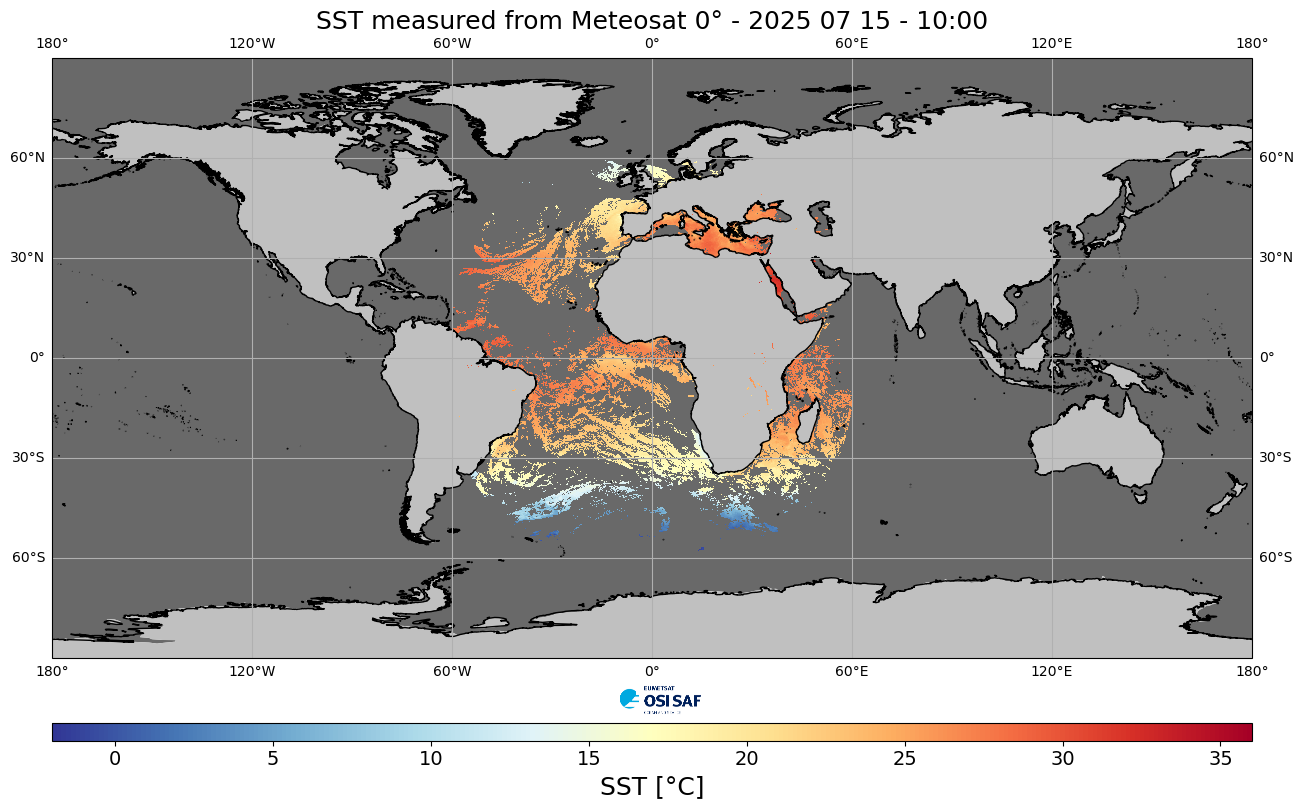

In [7]:
# Create a figure 
fig = plt.figure(figsize=(16,9))

# Add output projection type 
output_projection=ccrs.PlateCarree()

# define title
title = "SST measured from Meteosat 0° - 2025 07 15 - 10:00"

# Mapping MSG 0 data
im = mapping_sst(directory_Met0,
                 output_projection, 
                 cmap,
                 title=title)

# Adding an horizontal colorbar       
add_colorbar(im, fig, 'horizontal', cmap=cmap)

We can here see clearly which part of the globe is observed from Meteosat 0°. It is a position that allows to cover Europe (to the exception of latitudes above 60°N). It covers as well all of Africa and an important part of the Atlantic Ocean.

#### Other type of mapping

Let's try a different projection. We will reconstruct the earth view as the satellite observe it (geostationnary view).

(projection from the <a href="https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html" target="_blank">cartopy catalogue</a>)

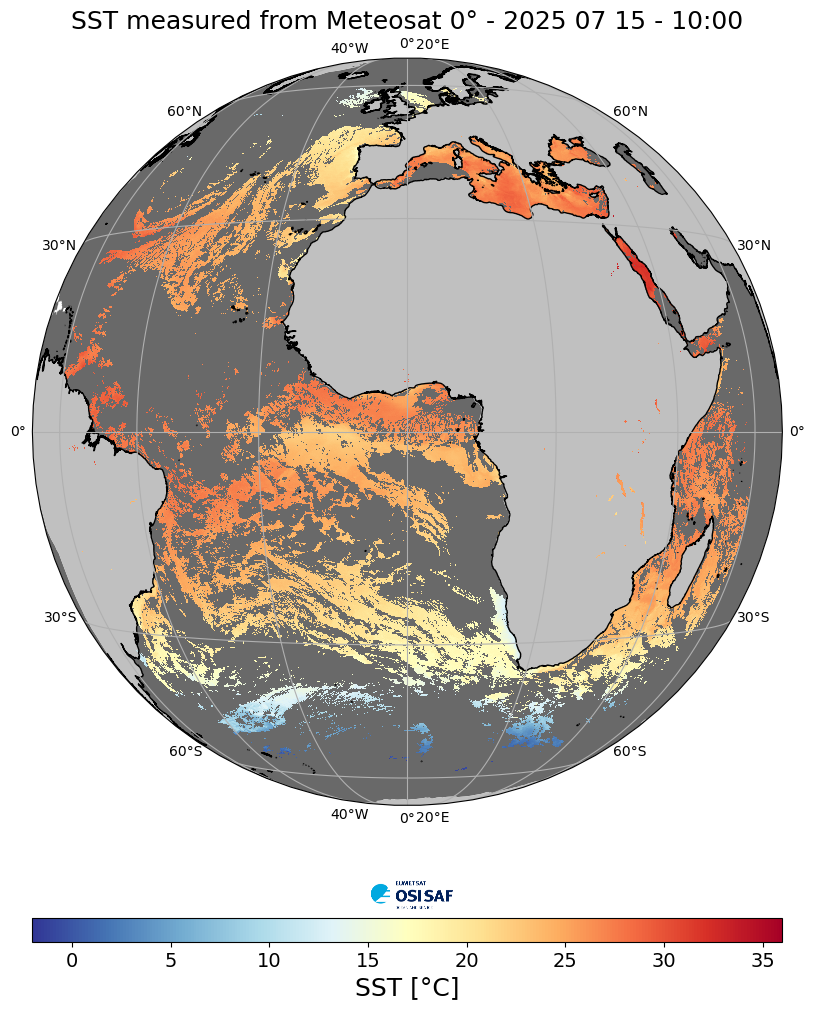

In [8]:
# Create a figure 
fig = plt.figure(figsize=(10,12))

# Add output projection type 
output_projection=ccrs.Geostationary(0,)

# define title
title = "SST measured from Meteosat 0° - 2025 07 15 - 10:00"

# Mapping MSG 0 data
im = mapping_sst(directory_Met0, 
                 output_projection,
                 cmap, 
                 title=title)

# Adding an horizontal colorbar       
add_colorbar(im, fig, 'horizontal', cmap=cmap)

### Meteosat IO data

Let's now try the same thing with the data from Meteosat-9 on Meteosat IO position.

#### Global Map

As we did with Meteosat 0° data, Let's start by ploting the data on a global map.

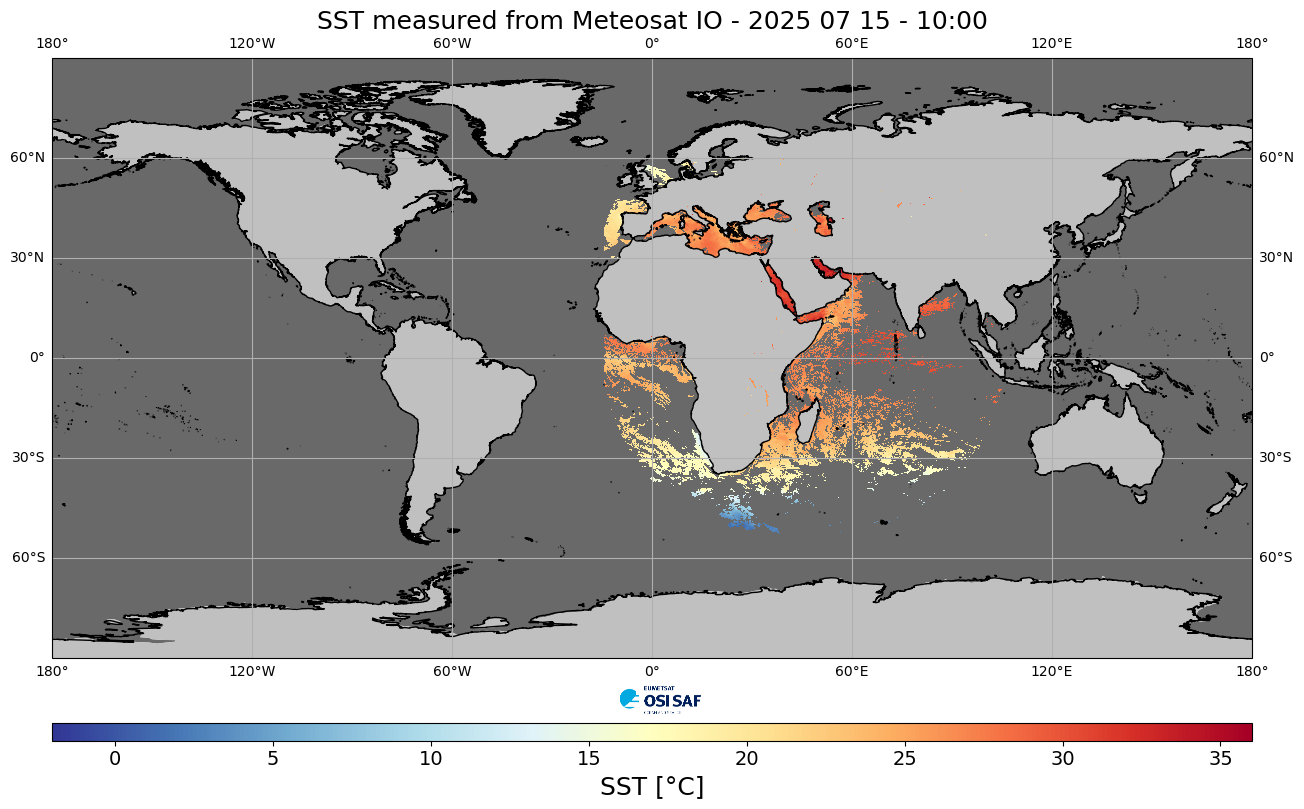

In [9]:
# Create a figure 
fig = plt.figure(figsize=(16,9))

# Add output projection type 
output_projection=ccrs.PlateCarree()

# define title

title = "SST measured from Meteosat IO - 2025 07 15 - 10:00"

# Mapping MSG 0 data
im = mapping_sst(directory_MetIO,
                 output_projection,
                 cmap,
                 title=title)

# Adding an horizontal colorbar       
add_colorbar(im, fig, 'horizontal', cmap=cmap)

As we can see on the figure, the Meteosat IO position is above the indian ocean near the coasts of Somalia. It allows observation from Sumatra to Sierra Leone. It allows accurate observation of the western Indian Ocean.

#### Other type of mapping

Let's try mapping it in a geostationnary reconstruct view.

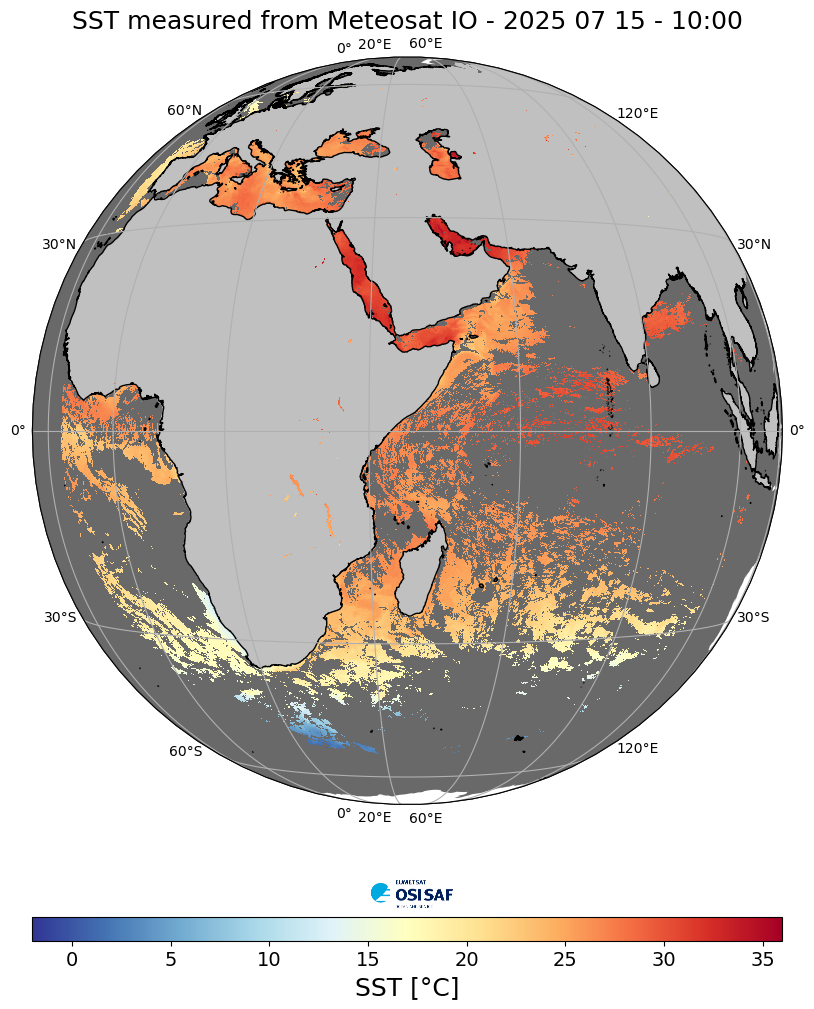

In [10]:
# Create a figure 
fig = plt.figure(figsize=(10,12))

# Add output projection type 
output_projection=ccrs.Geostationary(45,)

# define axis and title
ax = plt.axes([0.1,0.1,0.75,0.85], projection=output_projection)
title = "SST measured from Meteosat IO - 2025 07 15 - 10:00"

# Mapping MSG 0 data
im = mapping_sst(directory_MetIO, 
                 output_projection,
                 cmap,
                 title=title)

# Adding an horizontal colorbar       
add_colorbar(im, fig, 'horizontal', cmap=cmap)

### GOES East data

Let's now have a look at GOES East SST file.

#### Global Map

Again starting with a plot on a global map.

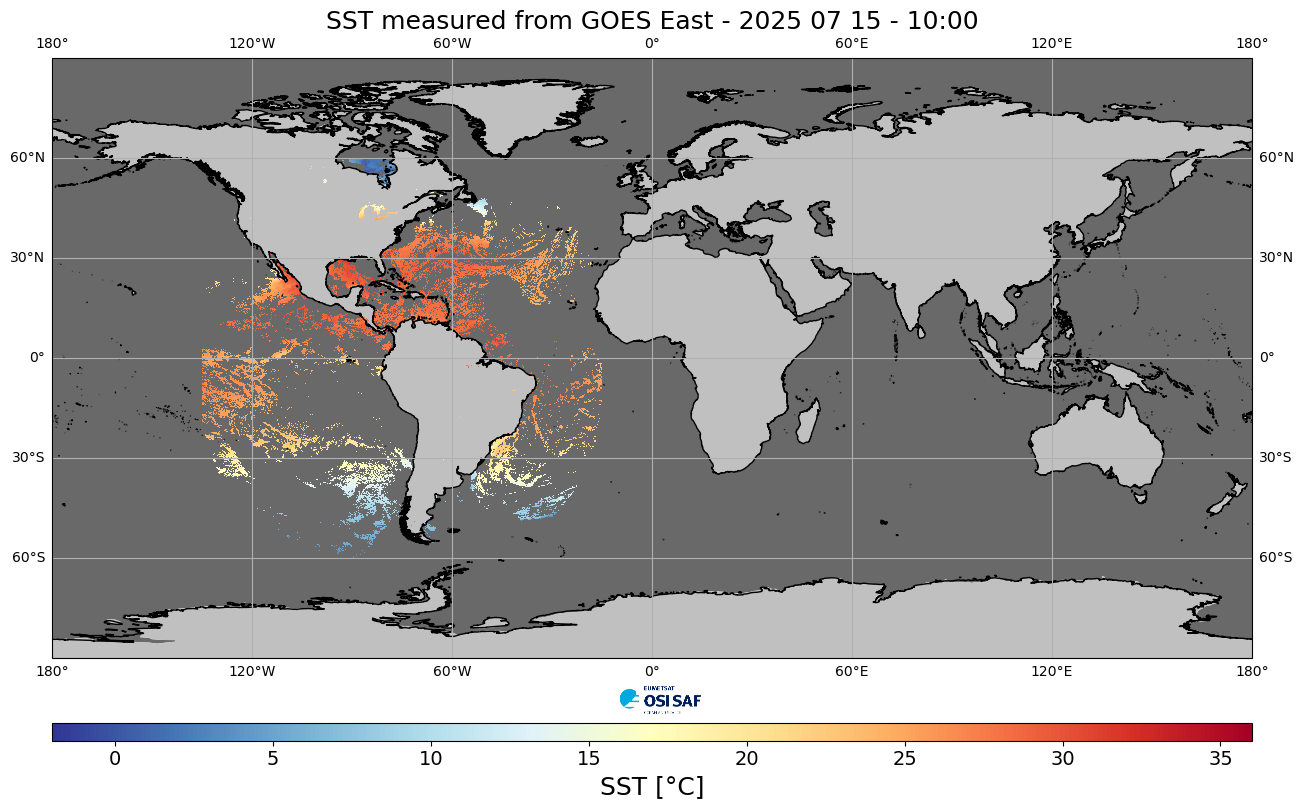

In [11]:
# Create a figure 
fig = plt.figure(figsize=(16,9))

# Add output projection type 
output_projection=ccrs.PlateCarree()

# define title
title = "SST measured from GOES East - 2025 07 15 - 10:00"

# Mapping MSG 0 data
im = mapping_sst(directory_GOES,
                 output_projection, 
                 cmap,
                 title=title)

# Adding an horizontal colorbar       
add_colorbar(im, fig, 'horizontal', cmap=cmap)

GOES East position is above Columbia (Department of Putumayo). It allows accurate observation of the Carribean Sea and the Eastern Pacific.

#### Other type of mapping

And then, let's try the geostationnary view projection with it.

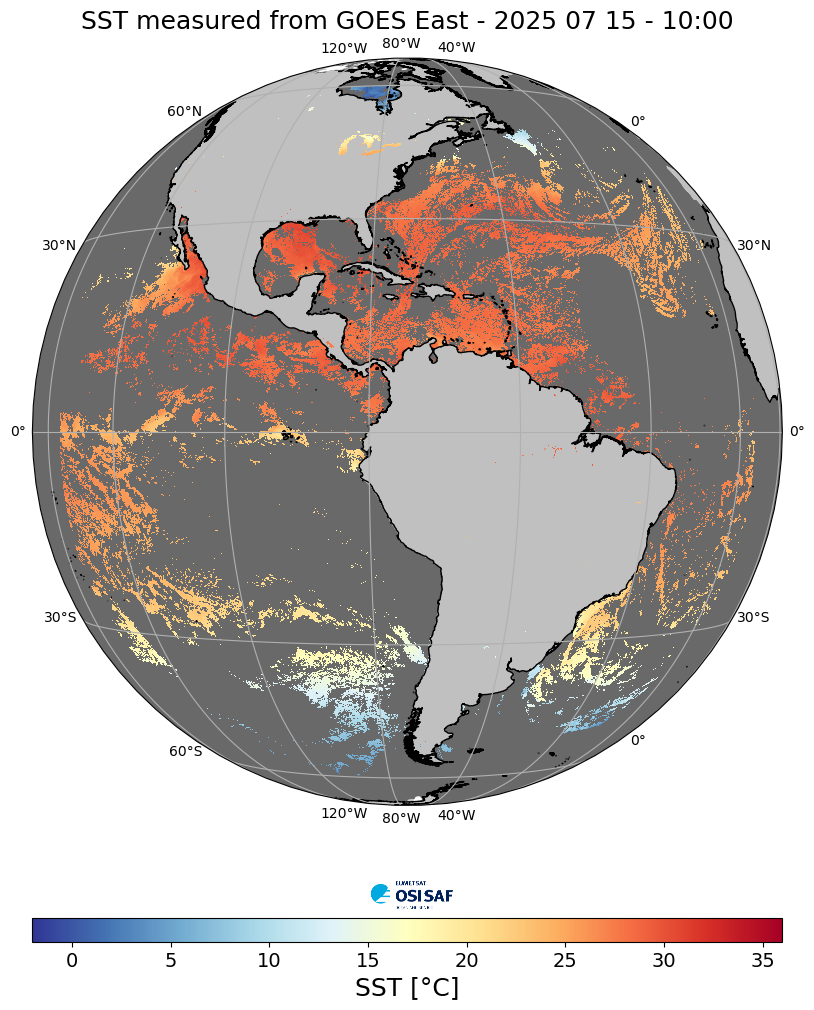

In [12]:
# Create a figure 
fig = plt.figure(figsize=(10,12))

# Add output projection type 
output_projection=ccrs.Geostationary(-75,)

# define title
title = "SST measured from GOES East - 2025 07 15 - 10:00"

# Mapping MSG 0 data
im = mapping_sst(directory_GOES, 
                 output_projection,
                 cmap,
                 title=title)

# Adding an horizontal colorbar       
add_colorbar(im, fig, 'horizontal', cmap=cmap)

<div class="alert alert-info" role="alert">

## <a id='section3'></a> 3. Combined image
[Back to top](#TOC-TOP)

</div>

As our products share same time characteristics, it is possible to combine them to have half a geostationnnary-belt view on a single map. To change a bit, we will do it without the functions described above. 

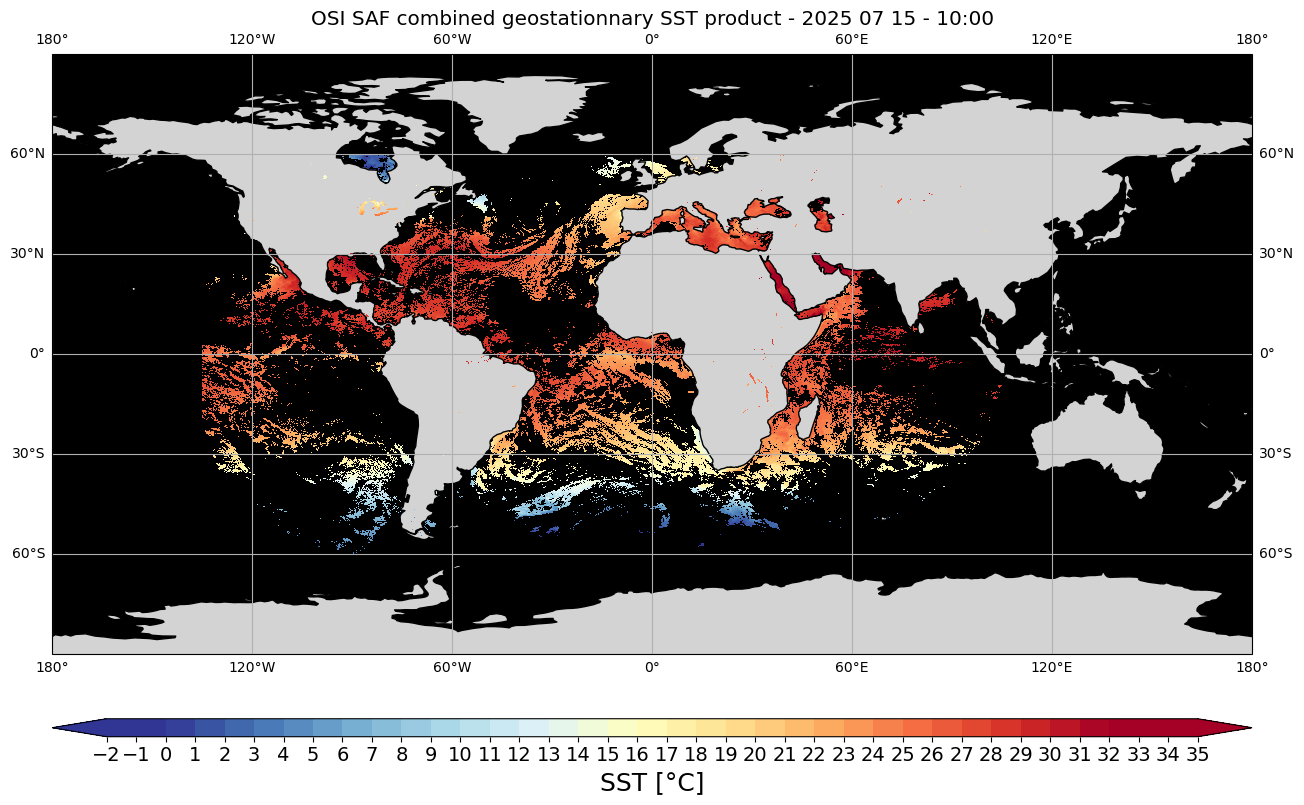

In [13]:
fig = plt.figure(figsize=(16,9))

# set data projection and request output projection
data_projection=ccrs.PlateCarree()
output_projection=ccrs.PlateCarree()

# define plot carateristics
ax = plt.axes([0.1,0.1,0.75,0.85], projection=output_projection)
ax.set_global()    # have a global map
ax.add_feature(cfeature.OCEAN, zorder=0, facecolor='black') # Change color of ocean
ax.add_feature(cfeature.LAND, zorder=0, facecolor='lightgrey') # Change color of land
ax.gridlines(draw_labels=True)   # Add grid line with latitude and logitude label 
ax.coastlines()    # Add coastline
ax.set_title('OSI SAF combined geostationnary SST product - 2025 07 15 - 10:00', fontdict={'fontsize': 'x-large', 'fontweight': 'roman'})

# open and plot data
for dir in os.listdir('products'):
    if dir == 'L3_Meteosat_0°' or dir == 'L3_GOES-E' or dir == 'L3_Meteosat_IO':
        directory = 'products/'+dir
        for filename in os.listdir(directory):
            if filename.endswith(".nc"):
                nc = xr.open_dataset(directory + '/' + filename)
                lat = nc.variables['lat'][:]    
                lon = nc.variables['lon'][:]
                sst = nc.variables['sea_surface_temperature'][:]
                ql  = nc.variables['quality_level'][:]
                nc.close()

                # Use only SST with quality_level > 2
                sst_ql345 = np.ma.masked_where(ql<3, sst)

                # plotting sst
                im = plt.pcolormesh(lon, lat, sst_ql345[0,:,:]-273.15, transform=data_projection, cmap=cmap)

                # set the min and max temperature for apropriate visualisation
                im.set_clim(0,32)

# Adding a colorbar       
axc = fig.add_axes((0.1,0.10,0.75,0.02))
bounds = range(-2,36)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb = plt.colorbar(im, orientation='horizontal', cax=axc, extend='both', norm=norm, spacing='proportional', ticks=bounds, boundaries=bounds)
cb.set_label('SST [°C]', fontsize=18)
cb.ax.tick_params(labelsize=14)

<hr>
<a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="./1_3a_OSI_SAF_SST_mapping_Global_Metop_SST.ipynb" target="_blank"><< Mapping Global Metop AVHRR SST products</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_3c_OSI_SAF_SST_mapping_NAR.ipynb" target="_blank">Mapping NAR SST products >></a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>